In [22]:
import pandas as pd

In [23]:
print(pd.__version__)

1.4.4


### DataFrame 구조
- index(row) - column(column) - data

In [24]:
num_list = [10, 20, 30, 40, 50]
pd.DataFrame(data=num_list)

0
0  10
1  20
2  30
3  40
4  50

In [25]:
double_list = [
             [1000, '과자','2019-12-31','반품'],
             [2000, '음료', '2020-03-02', '정상'],
             [3000, '아이스크림', '2020-02-03','정상'],
             [1000,'과자','2019-12-31','반품']
            ]
pd.DataFrame(data=double_list)

0      1           2   3
0  1000     과자  2019-12-31  반품
1  2000     음료  2020-03-02  정상
2  3000  아이스크림  2020-02-03  정상
3  1000     과자  2019-12-31  반품

In [26]:
double_columns = ['가격','종류','판매일자','반품여부']
df_saledays = pd.DataFrame(data=double_list, columns=double_columns)
df_saledays

가격     종류        판매일자 반품여부
0  1000     과자  2019-12-31   반품
1  2000     음료  2020-03-02   정상
2  3000  아이스크림  2020-02-03   정상
3  1000     과자  2019-12-31   반품

In [27]:
type(df_saledays)

pandas.core.frame.DataFrame

In [28]:
df_saledays.columns, type(df_saledays.columns), list(df_saledays.columns)

(Index(['가격', '종류', '판매일자', '반품여부'], dtype='object'),
 pandas.core.indexes.base.Index,
 ['가격', '종류', '판매일자', '반품여부'])

In [29]:
df_saledays.index

RangeIndex(start=0, stop=4, step=1)

In [30]:
df_saledays.values

array([[1000, '과자', '2019-12-31', '반품'],
       [2000, '음료', '2020-03-02', '정상'],
       [3000, '아이스크림', '2020-02-03', '정상'],
       [1000, '과자', '2019-12-31', '반품']], dtype=object)

In [31]:
df_saledays_dropcol = df_saledays.drop(columns=['종류', '판매일자',])
# df_saledays.drop(columns=['종류', '판매일자',], inplace=True) # 지정한 df 값이 변화한다.

In [32]:
df_saledays_dropcol

가격 반품여부
0  1000   반품
1  2000   정상
2  3000   정상
3  1000   반품

In [33]:
## 필터 : and - &, or - |
# condition = (df_saledays_dropcol['반품여부'] == '정상') 
condition = (df_saledays_dropcol['가격'] >= 2500)
df_saledays_dropcol.loc[condition]

가격 반품여부
2  3000   정상

In [34]:
# (df_saledays_dropcol['가격'] >= 2500) | (df_saledays_dropcol['가격'] <= 1000) # 특정 범위 선택
(df_saledays_dropcol['반품여부'] == '정상') & (df_saledays_dropcol['가격'] >= 2500)

0    False
1    False
2     True
3    False
dtype: bool

In [35]:
## 요약
#df_saledays_dropcol.pivot_table(index='반품여부', values='가격')
#pd.pivot_table(data=df_saledays_dropcol, index='반품여부', values='가격')
import numpy as np
df_saledays_dropcol.pivot_table(index='반품여부', values='가격', aggfunc='min')

가격
반품여부      
반품    1000
정상    2000

In [36]:
df_saledays.pivot_table(index=['반품여부', '종류'], values='가격', aggfunc=[np.sum, np.min, np.size])

sum  amin size
              가격    가격   가격
반품여부 종류                    
반품   과자     2000  1000    2
정상   아이스크림  3000  3000    1
     음료     2000  2000    1

In [37]:
df_saledays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   가격      4 non-null      int64 
 1   종류      4 non-null      object
 2   판매일자    4 non-null      object
 3   반품여부    4 non-null      object
dtypes: int64(1), object(3)
memory usage: 256.0+ bytes


In [38]:
df_saledays  # df_saledays['가격'].mean()

가격     종류        판매일자 반품여부
0  1000     과자  2019-12-31   반품
1  2000     음료  2020-03-02   정상
2  3000  아이스크림  2020-02-03   정상
3  1000     과자  2019-12-31   반품

### apply()

#### 단일 변수

In [39]:
def mean_subtraction(cell_value) :
    result = 1750 - cell_value  # 가격 평균 - 개별값
    return result

In [40]:
mean_subtraction(750)

1000

In [41]:
df_saledays['가격'].apply(mean_subtraction)

0     750
1    -250
2   -1250
3     750
Name: 가격, dtype: int64

In [42]:
df_saledays['가격차이'] = df_saledays['가격'].apply(mean_subtraction)  # 각 cell당 평균 차이값

In [43]:
df_saledays

가격     종류        판매일자 반품여부  가격차이
0  1000     과자  2019-12-31   반품   750
1  2000     음료  2020-03-02   정상  -250
2  3000  아이스크림  2020-02-03   정상 -1250
3  1000     과자  2019-12-31   반품   750

In [44]:
df_saledays['가격'] + df_saledays['가격차이']

0    1750
1    1750
2    1750
3    1750
dtype: int64

#### 다변수

In [60]:
df_saledays

가격     종류        판매일자 반품여부  가격차이
0  1000     과자  2019-12-31   반품   750
1  2000     음료  2020-03-02   정상  -250
2  3000  아이스크림  2020-02-03   정상 -1250
3  1000     과자  2019-12-31   반품   750

### Series
- index - data

In [45]:
single_data = [0.1, 0.2, 0.3, 0.4, 0.5]
series_floats = pd.Series(data=single_data)
series_floats

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
dtype: float64

In [46]:
type(series_floats)

pandas.core.series.Series

### 통계 수치 표현

In [47]:
import numpy as np

In [48]:
arr = np.array([6, 4, 1, 3, 5, 3, 10, 7, 9])
arr

array([ 6,  4,  1,  3,  5,  3, 10,  7,  9])

In [49]:
# 평균, 합계
np.mean(arr), np.sum(arr)

(5.333333333333333, 48)

In [50]:
# 중앙값
np.median(arr)

5.0

In [51]:
# 최소값, 최대값
print(np.min(arr), np.max(arr))

1 10


In [52]:
# 분산, 표준편차
np.var(arr), np.std(arr)

(7.777777777777778, 2.788866755113585)

In [53]:
np.size(arr)

9

### IQR

In [54]:
import numpy as np
data = np.array([44, 32, 53, 75, 36, 45, 25, 49, 46, 28])

In [55]:
Q1 = np.percentile(data, 25)

In [56]:
Q3 = np.percentile(data, 75)

In [57]:
import seaborn as sns

In [58]:
Q1, Q3, Q3 - Q1, np.median(data)

(33.0, 48.25, 15.25, 44.5)

C:\Users\05-16\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

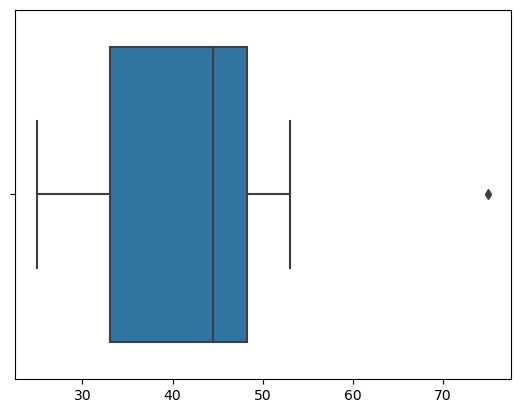

In [59]:
sns.boxplot(data)